# Task
Apply linear contrast stretching to the image "/content/Boy sit on stairs.jpg" with an original range of 10-70, a new range of 0-255, and a contrast enhancement factor of 2. Display the original and the contrast-stretched images side-by-side.

## Load the image

### Subtask:
Load the image from the provided path.


**Reasoning**:
Import the necessary library and load the image into a variable.



In [1]:
import cv2
img = cv2.imread('/content/Boy sit on stairs.jpg')

## Define the contrast stretching function

### Subtask:
Create a function that takes a pixel value, the original range (10-70), the new range (0-255), and the contrast enhancement factor (2) as input, and returns the new pixel value after applying the linear contrast stretching formula.


**Reasoning**:
Define a function to perform linear contrast stretching on a single pixel value based on the provided formula and ranges, including clipping the result.



In [2]:
def linear_contrast_stretch_pixel(pixel, original_min, original_max, new_min, new_max, enhancement_factor):
    """
    Applies linear contrast stretching to a single pixel value.

    Args:
        pixel: The original pixel value.
        original_min: The minimum value of the original range.
        original_max: The maximum value of the original range.
        new_min: The minimum value of the new range.
        new_max: The maximum value of the new range.
        enhancement_factor: The factor to enhance the contrast.

    Returns:
        The new pixel value after contrast stretching, clipped to the new range.
    """
    # Apply the linear contrast stretching formula
    new_pixel = (pixel - original_min) * ((new_max - new_min) / (original_max - original_min)) * enhancement_factor + new_min

    # Clip the new pixel value to the new range
    new_pixel = max(new_min, min(new_max, new_pixel))

    return new_pixel

## Apply the function

### Subtask:
Iterate through each pixel of the image and apply the defined contrast stretching function to transform the pixel values.


**Reasoning**:
Create a copy of the image and iterate through its pixels to apply the contrast stretching function.



In [3]:
import numpy as np

img_stretched = np.copy(img)

original_min = 10
original_max = 70
new_min = 0
new_max = 255
enhancement_factor = 2

for i in range(img_stretched.shape[0]):
    for j in range(img_stretched.shape[1]):
        for k in range(img_stretched.shape[2]): # Iterate through color channels
            pixel_value = img_stretched[i, j, k]
            new_pixel_value = linear_contrast_stretch_pixel(pixel_value, original_min, original_max, new_min, new_max, enhancement_factor)
            img_stretched[i, j, k] = np.uint8(new_pixel_value)


/tmp/ipython-input-1802080918.py:17: RuntimeWarning: overflow encountered in scalar subtract
  new_pixel = (pixel - original_min) * ((new_max - new_min) / (original_max - original_min)) * enhancement_factor + new_min


**Reasoning**:
The previous code block produced a RuntimeWarning related to overflow during subtraction. This might be due to the data type of the pixel values or intermediate calculations. I need to regenerate the code block to ensure the calculations are performed with a data type that can handle the potential range of values and then cast the final result to uint8. I will regenerate the full code block to ensure all steps are included and correct.



In [4]:
import numpy as np

img_stretched = np.copy(img)

original_min = 10
original_max = 70
new_min = 0
new_max = 255
enhancement_factor = 2

for i in range(img_stretched.shape[0]):
    for j in range(img_stretched.shape[1]):
        for k in range(img_stretched.shape[2]): # Iterate through color channels
            pixel_value = img_stretched[i, j, k].astype(np.float64) # Cast to float64 for calculations
            new_pixel_value = linear_contrast_stretch_pixel(pixel_value, original_min, original_max, new_min, new_max, enhancement_factor)
            img_stretched[i, j, k] = np.uint8(new_pixel_value) # Cast back to uint8 for image display


## Display the original and stretched images

### Subtask:
Display both the original and the contrast-stretched images side-by-side for comparison.


**Reasoning**:
Display the original and contrast-stretched images side-by-side using matplotlib.



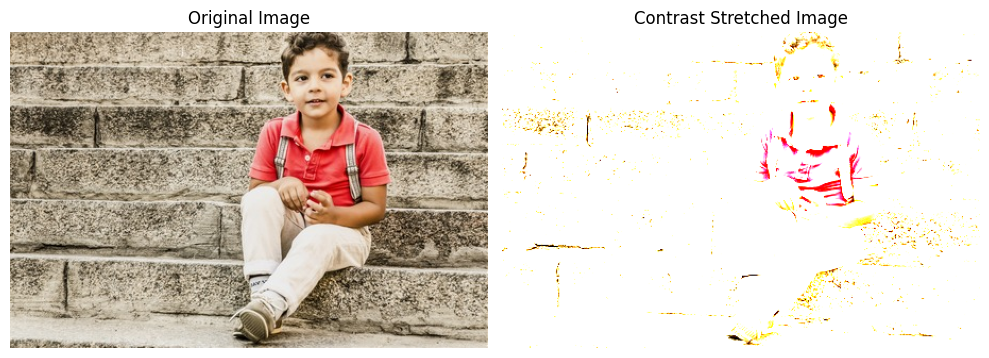

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(img_stretched, cv2.COLOR_BGR2RGB))
axes[1].set_title("Contrast Stretched Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   Linear contrast stretching was applied to the image with an original range of 10-70 and a new range of 0-255, using an enhancement factor of 2.
*   The process involved iterating through each pixel and applying a custom function that implemented the contrast stretching formula.
*   Intermediate calculations during contrast stretching required casting pixel values to `np.float64` to avoid overflow issues before casting the final result back to `np.uint8` for image display.

### Insights or Next Steps

*   The contrast-stretched image should exhibit higher visual contrast, particularly in areas where the original pixel values were within the 10-70 range.
*   Further analysis could involve evaluating the impact of different enhancement factors on the visual quality and information content of the image.
